# 1) Simulate your input LC

Read 746 lines of data

### Fit successful: ###
Parameter 1: 0.00886184506351
Parameter 2: 0.00312738526952
Parameter 3: 462.480912917
Parameter 4: 7.96809757573
PDF not fitted, fitting using defaults (gamma + lognorm)


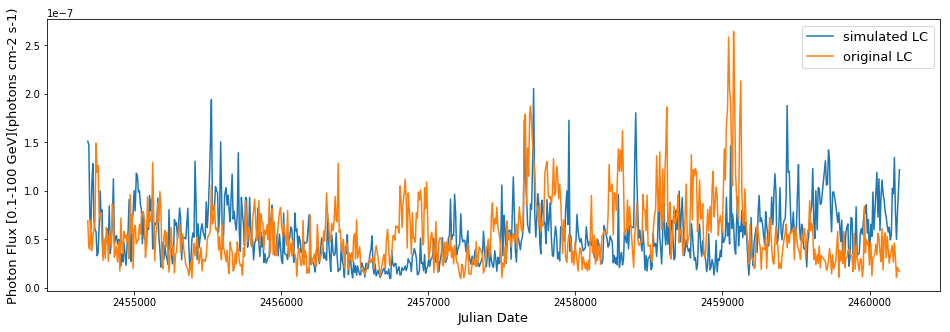

In [18]:
from DELCgen import *
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling import models, fitting

#------- Input parameters -------

# File Route

route = "/Users/shinnakim/fermi/fermipy-tutorial/data/blazar/mysource_all/lightcurve/"
datfile = "t_coltrim.dat"

org_time, org_flux = np.genfromtxt(route+datfile, usecols=(0,1), unpack=True)


# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009

# Probability density function params
kappa,theta,lnmu,lnsig,weight = 5.67, 5.96, 2.14, 0.31,0.82
# Simulation params
RedNoiseL,aliasTbin, tbin = 100,1,100

#--------- Commands ---------------

# load data lightcurve
datalc = Load_Lightcurve(route+datfile,tbin)

def Fix_BL(v,A,v_bend,a_high,c):
    p = BendingPL(v,A,v_bend,1.1,a_high,c)
    return p

datalc.Fit_PSD(initial_params=[1,0.001,2.5,0],model=Fix_BL)

# create mixture distribution to fit to PDF
mix_model = Mixture_Dist([st.gamma,st.lognorm],[3,3],[[[2],[0]],[[2],[0],]])


# estimate underlying variance of data light curve
datalc.STD_Estimate()

# simulate artificial light curve with Timmer & Koenig method
tklc = Simulate_TK_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),lightcurve=datalc,
                                RedNoiseL=RedNoiseL,aliasTbin=aliasTbin)

# simulate artificial light curve with Emmanoulopoulos method, scipy distribution
delc_mod = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                               mix_model, (kappa, theta, lnsig, np.exp(lnmu),
                                                              weight,1-weight),lightcurve=datalc)

# simulate artificial light curve with Emmanoulopoulos method, using the PSD
# and PDF of the data light curve, with default parameters (bending power law
# for PSD and mixture distribution of gamma and lognormal distribution for PDF)
delc = datalc.Simulate_DE_Lightcurve()

# save the simulated light curve as a txt file
delc.Save_Lightcurve('mylightcurve.dat')

mytime, myflux = np.genfromtxt('mylightcurve.dat', usecols=(0,1), unpack=True)
plt.rcParams["figure.figsize"] = (16,5)
plt.plot(mytime, myflux, label='simulated LC')
plt.plot(org_time, org_flux, label='original LC')
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=13)
plt.legend(loc='upper right', fontsize=13)
plt.savefig('mysimulationLC.png')
plt.show()

# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc,delc_mod],names=["Data LC","Timmer \& Koenig",
#               "Emmanoulopoulos from model","Emmanoulopoulos from data"],bins=25)

TypeError: BendingPL() takes exactly 6 arguments (5 given)

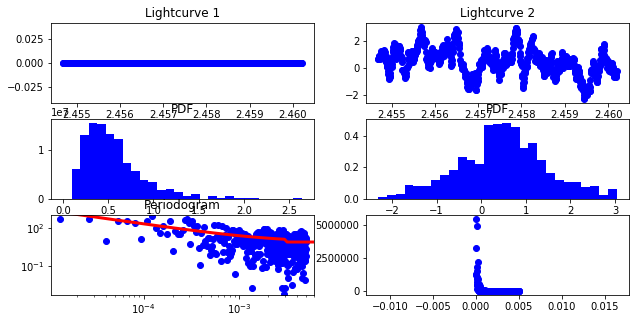

In [19]:
Comparison_Plots([datalc,tklc,delc])

# 2) Simulate a new LC with the same PDF as the input LC and 2a) Simple PL, b) Broken PL, c) Curved PL

To clarify, you can choose any PSD values for 2a,b,c. Just need to keep the same PDF as the original data.

You should have 4 simulated LC by this point.

# PDF

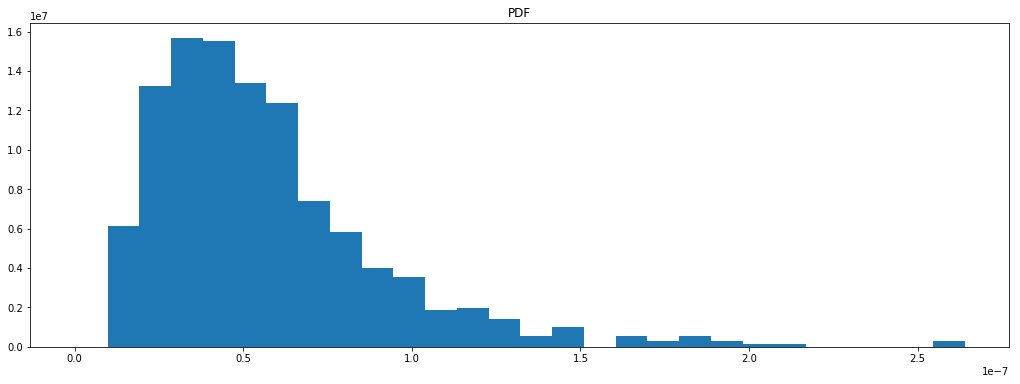

In [20]:
datalc.Plot_PDF()

In [21]:
datalc.Fit_PDF()


### Fit successful: ###

Gamma Function:
kappa: 6.0
theta: 6.0
weight: 0.8

Lognormal Function:
exp(ln(mu)): 0.3
ln(sigma): 7.4
weight: 0.2


Read 746 lines of data
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)


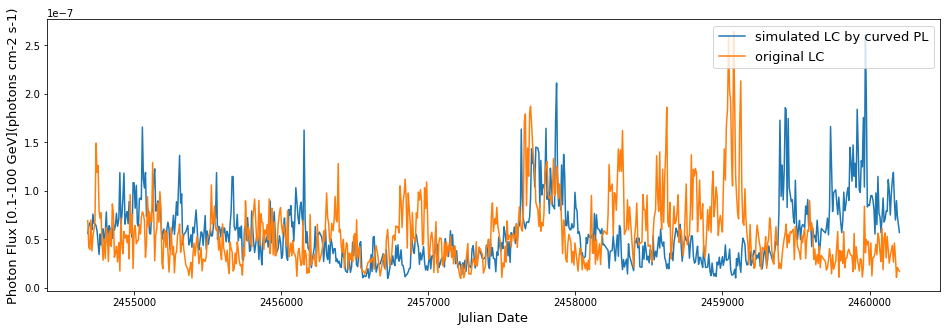

In [22]:
#------- Input parameters -------

# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009

# Simple power law params
x, amp, alpha = org_time, 1.0, -2.0

# Probability density function params
# These values are derived from above
kappa,theta,lnmu,lnsig,weight = 6.0, 6.0, 0.3, 7.4, 0.2

# Simulation params
RedNoiseL,aliasTbin, tbin = 100,1,100

#--------- Commands ---------------
# load data lightcurve
datalc = Load_Lightcurve(route+datfile,tbin)

def Fix_BL(v,A,v_bend,a_high,c):
    p = BendingPL(v,A,v_bend,1.1,a_high,c)
    return p

# Define simple power law
def Simple_PL(x, amp, alpha):
    powerlaw_model = models.PowerLaw1D(amplitude=amp, x_0=x, alpha=alpha)
    #fitter = fitting.LevMarLSQFitter()
    #best_fit_model = fitter(powerlaw_model, x, org_flux)
    return powerlaw_model#best_fit_model(x)


# simulate artificial light curve with Emmanoulopoulos method, scipy distribution
delc_mod = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                               mix_model, (kappa, theta, lnsig, np.exp(lnmu),
                                                              weight,1-weight),lightcurve=datalc)

# simulate artificial light curve with Emmanoulopoulos method, using the PSD
# and PDF of the data light curve, with default parameters (bending power law
# for PSD and mixture distribution of gamma and lognormal distribution for PDF)
delc = datalc.Simulate_DE_Lightcurve()

# save the simulated light curve as a txt file
delc.Save_Lightcurve('mylightcurve_curvedPL.dat')


# simulate artificial light curve with simple PL
#delc_simple = Simulate_DE_Lightcurve(Simple_PL, (x, amp, alpha), lightcurve=datalc)

# simulate artificial light curve with Emmanoulopoulos method, using the PSD
# and PDF of the data light curve, with default parameters (bending power law
# for PSD and mixture distribution of gamma and lognormal distribution for PDF)
#delc_simplePL = datalc.Simulate_DE_Lightcurve()


# save the simulated light curve as a txt file
#delc_simplePL.Save_Lightcurve('mylightcurve_simplePL.dat')

mytime, myflux = np.genfromtxt('mylightcurve_curvedPL.dat', usecols=(0,1), unpack=True)
plt.rcParams["figure.figsize"] = (16,5)
plt.plot(mytime, myflux, label='simulated LC by curved PL')
plt.plot(org_time, org_flux, label='original LC')
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=13)
plt.legend(loc='upper right', fontsize=13)
plt.savefig('mysimulationLC.png')
plt.show()

# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc,delc_mod],names=["Data LC","Timmer \& Koenig",
#               "Emmanoulopoulos from model","Emmanoulopoulos from data"],bins=25)

# 3) Remove data from the simulated LCs in various ways.

In [23]:
flux_values = org_flux[1:]
time_values = org_time[1:]
flux_limits = [0.9, 0.7, 0.5]

for i, flux_limit in enumerate(flux_limits):
    globals()['flux_filtered_%s'%i] = flux_values[flux_values < flux_limit*max(flux_values)]
    globals()['time_filtered_%s'%i] = time_values[flux_values < flux_limit*max(flux_values)]

# 4) Calculate and compare the PSD and PDF of the "data-removed" LCs. You should have PSD and PDF plots for the original simulated light curves and each of the "data-removed" LCs.

PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)


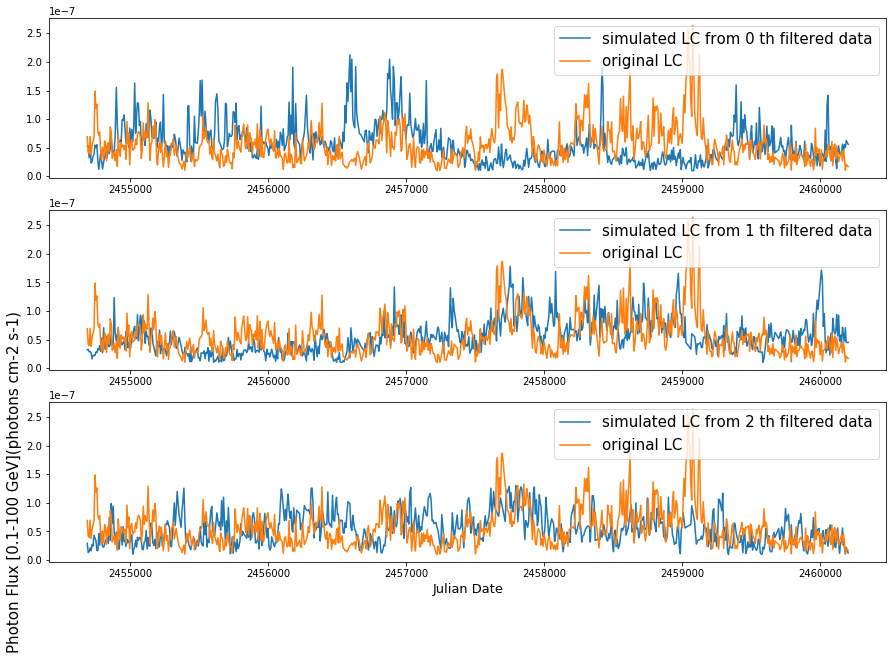

In [24]:
#------- Input parameters -------

# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009

# Probability density function params
# These values are derived from above
kappa,theta,lnmu,lnsig,weight = 6.0, 6.0, 0.3, 7.4, 0.2

# Simulation params
RedNoiseL,aliasTbin, tbin = 100,1,100

def Fix_BL(v,A,v_bend,a_high,c):
    p = BendingPL(v,A,v_bend,1.1,a_high,c)
    return p
    
#--------- Commands ---------------
# load data lightcurve
for i in range(len(flux_limits)):
    globals()['rmv_lc_%s'%i] = Lightcurve(globals()['time_filtered_%s'%i],globals()['flux_filtered_%s'%i],errors=None,tbin=tbin)

    # simulate artificial light curve with Emmanoulopoulos method, scipy distribution
    globals()['delc_mod_%s'%i] = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                               mix_model, (kappa, theta, lnsig, np.exp(lnmu),
                                                              weight,1-weight),lightcurve=globals()['rmv_lc_%s'%i])

    # simulate artificial light curve with Emmanoulopoulos method, using the PSD
    # and PDF of the data light curve, with default parameters (bending power law
    # for PSD and mixture distribution of gamma and lognormal distribution for PDF)
    globals()['delc_%s'%i] = globals()['rmv_lc_%s'%i].Simulate_DE_Lightcurve()

    # save the simulated light curve as a txt file
    globals()['delc_%s'%i].Save_Lightcurve('mylightcurve_%s.dat'%i)

    globals()['mytime_%s'%i], globals()['myflux_%s'%i]= np.genfromtxt('mylightcurve_%s.dat'%i, usecols=(0,1), unpack=True)

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(len(flux_limits))
for i in range(len(flux_limits)):
    axs[i].plot(globals()['mytime_%s'%i], globals()['myflux_%s'%i], label='simulated LC from %s th filtered data'%i)
    axs[i].plot(org_time, org_flux, label='original LC')

    axs[i].legend(loc='upper right', fontsize=15)
    plt.savefig('mysimulationLC_%s.png'%i)
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=15)
plt.show()

# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc,delc_mod],names=["Data LC","Timmer \& Koenig",
#               "Emmanoulopoulos from model","Emmanoulopoulos from data"],bins=25)

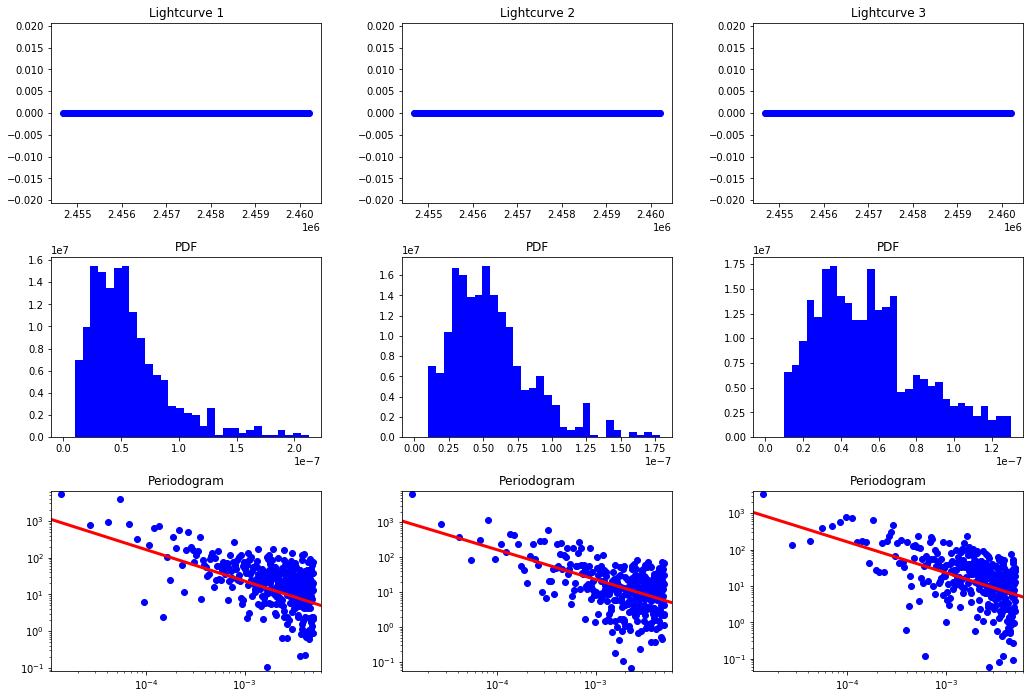

In [25]:
Comparison_Plots([delc_0,delc_1,delc_2])

# 5) Interpolate both the input LC and the "data-removed" LCs in various ways. e.g. a) Linear Interpolation, b) Spline Interpolation, c) Gaussian Process

## a) Linear Interpolation

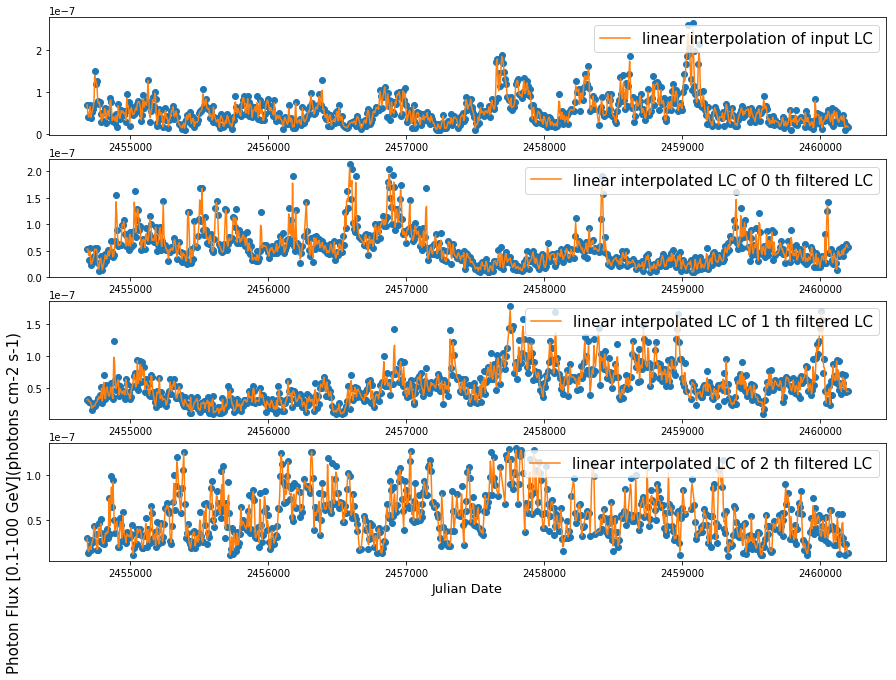

In [26]:
from scipy import interpolate

def linear_intp(x, y):
    f_linear = interpolate.interp1d(x, y, kind='linear')
    xnew = np.linspace(min(x), max(x), num=1001)
    y_new_linear = f_linear(xnew)
    return xnew, y_new_linear

fig, axs = plt.subplots(len(flux_limits)+1)
plt.rcParams["figure.figsize"] = (15,10)
input_LC_l_x, input_LC_l_y = linear_intp(org_time[1:], org_flux[1:])
axs[0].plot(org_time[1:], org_flux[1:], "o")
axs[0].plot(input_LC_l_x, input_LC_l_y, '-', label='linear interpolation of input LC')
axs[0].legend(loc='upper right', fontsize=15)

for i in range(len(flux_limits)):
    globals()['linear_x_%s'%i], globals()['linear_y_%s'%i] = linear_intp(globals()['mytime_%s'%i], globals()['myflux_%s'%i])
    axs[i+1].plot(globals()['mytime_%s'%i], globals()['myflux_%s'%i], "o")
    axs[i+1].plot(globals()['linear_x_%s'%i], globals()['linear_y_%s'%i], '-', label='linear interpolated LC of %s th filtered LC'%i)
    axs[i+1].legend(loc='upper right', fontsize=15)
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=15)
plt.show()

## b) Spline Interpolation

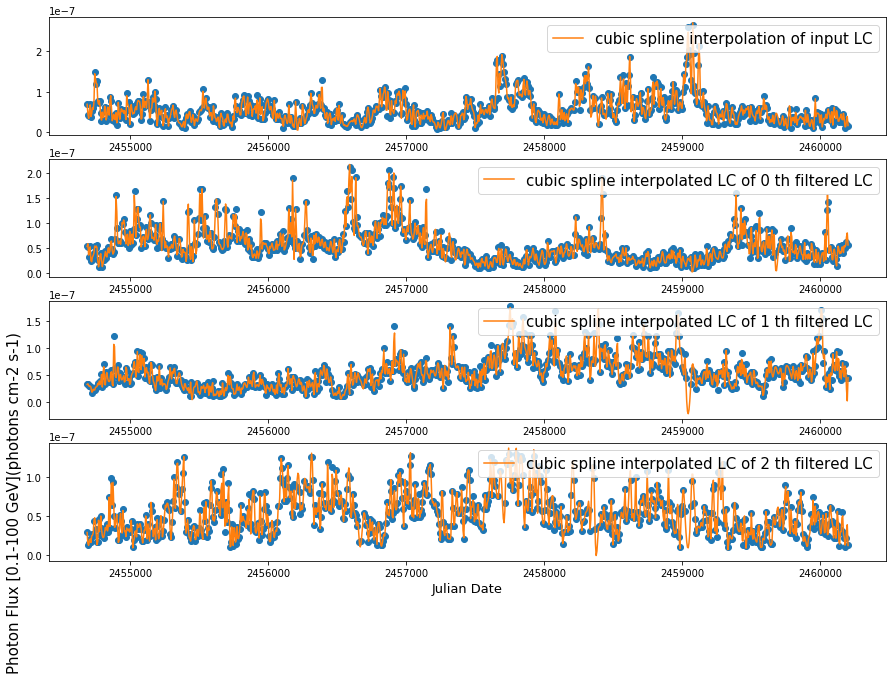

In [27]:
from scipy.interpolate import CubicSpline

def Cubic_Spline(x, y):
    xnew = np.linspace(min(x), max(x), num=1001)
    spl = CubicSpline(x, y)
    return xnew, spl(xnew)
    
fig, axs = plt.subplots(len(flux_limits)+1)
plt.rcParams["figure.figsize"] = (15,10)
input_LC_c_x, input_LC_c_y = Cubic_Spline(org_time[1:], org_flux[1:])
axs[0].plot(org_time[1:], org_flux[1:], "o")
axs[0].plot(input_LC_c_x, input_LC_c_y, '-', label='cubic spline interpolation of input LC')
axs[0].legend(loc='upper right', fontsize=15)

for i in range(len(flux_limits)):
    globals()['cubic_x_%s'%i], globals()['cubic_y_%s'%i] = Cubic_Spline(globals()['mytime_%s'%i], globals()['myflux_%s'%i])
    axs[i+1].plot(globals()['mytime_%s'%i], globals()['myflux_%s'%i], "o")
    axs[i+1].plot(globals()['cubic_x_%s'%i], globals()['cubic_y_%s'%i], '-', label='cubic spline interpolated LC of %s th filtered LC'%i)
    axs[i+1].legend(loc='upper right', fontsize=15)
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=15)
plt.show()


## c) Gaussian Process

# 6) Step 4 again.

## a) Linear-interpolated data

PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)


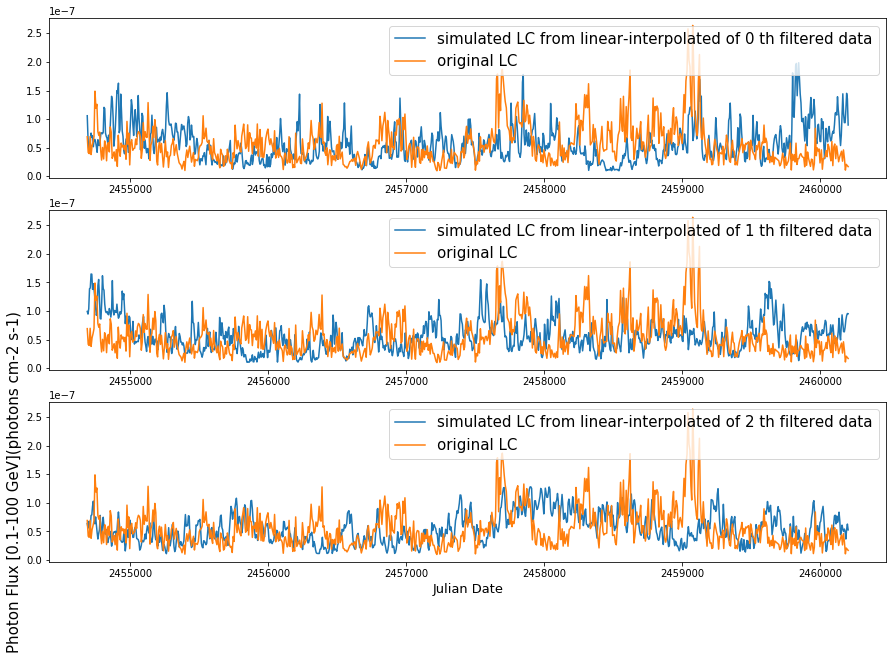

In [28]:
#------- Input parameters -------

# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009

# Probability density function params
# These values are derived from above
kappa,theta,lnmu,lnsig,weight = 6.0, 6.0, 0.3, 7.4, 0.2

# Simulation params
RedNoiseL,aliasTbin, tbin = 100,1,100

def Fix_BL(v,A,v_bend,a_high,c):
    p = BendingPL(v,A,v_bend,1.1,a_high,c)
    return p
    
#--------- Commands ---------------
# load data lightcurve
for i in range(len(flux_limits)):
    globals()['linear_lc_%s'%i] = Lightcurve(globals()['linear_x_%s'%i], globals()['linear_y_%s'%i],errors=None,tbin=tbin)

    # simulate artificial light curve with Emmanoulopoulos method, scipy distribution
    globals()['delc_mod_linear_%s'%i] = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                               mix_model, (kappa, theta, lnsig, np.exp(lnmu),
                                                              weight,1-weight),lightcurve=globals()['linear_lc_%s'%i])

    # simulate artificial light curve with Emmanoulopoulos method, using the PSD
    # and PDF of the data light curve, with default parameters (bending power law
    # for PSD and mixture distribution of gamma and lognormal distribution for PDF)
    globals()['delc_linear_%s'%i] = globals()['linear_lc_%s'%i].Simulate_DE_Lightcurve()

    # save the simulated light curve as a txt file
    globals()['delc_linear_%s'%i].Save_Lightcurve('mylightcurve_linear_%s.dat'%i)

    globals()['mytime_%s'%i], globals()['myflux_%s'%i]= np.genfromtxt('mylightcurve_linear_%s.dat'%i, usecols=(0,1), unpack=True)

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(len(flux_limits))
for i in range(len(flux_limits)):
    axs[i].plot(globals()['mytime_%s'%i], globals()['myflux_%s'%i], label='simulated LC from linear-interpolated of %s th filtered data'%i)
    axs[i].plot(org_time, org_flux, label='original LC')

    axs[i].legend(loc='upper right', fontsize=15)
    plt.savefig('mysimulationLC_linear_%s.png'%i)
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=15)
plt.show()

# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc,delc_mod],names=["Data LC","Timmer \& Koenig",
#               "Emmanoulopoulos from model","Emmanoulopoulos from data"],bins=25)

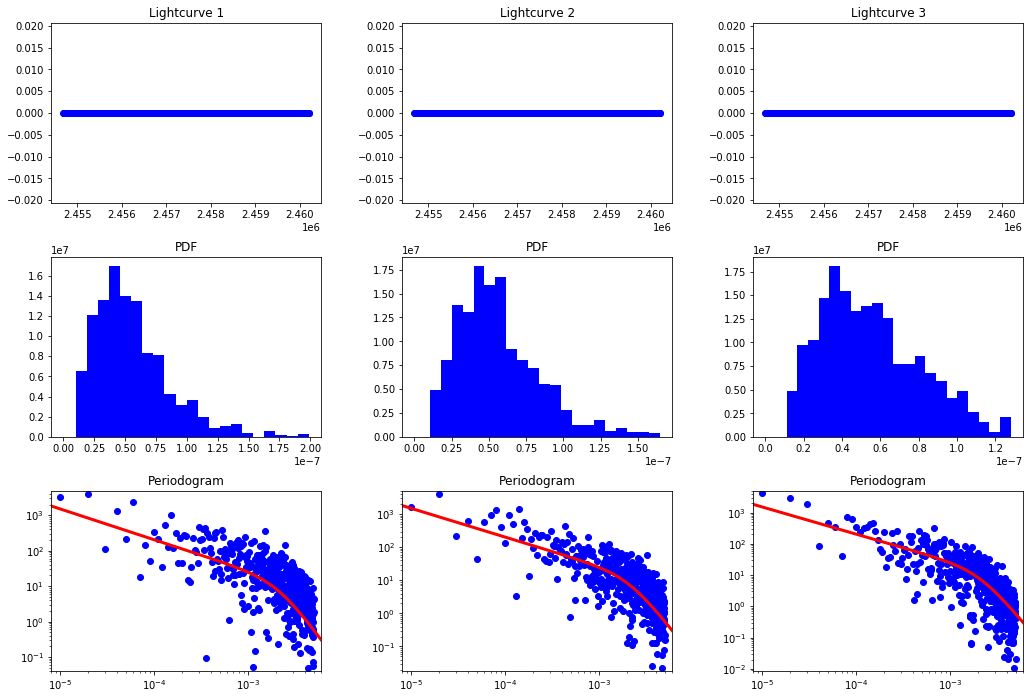

In [29]:
Comparison_Plots([delc_linear_0,delc_linear_1,delc_linear_2])

## b) Cubic-Splined-interpolated data

PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)
PSD not fitted, fitting using defaults (bending power law)...
PDF not fitted, fitting using defaults (gamma + lognorm)


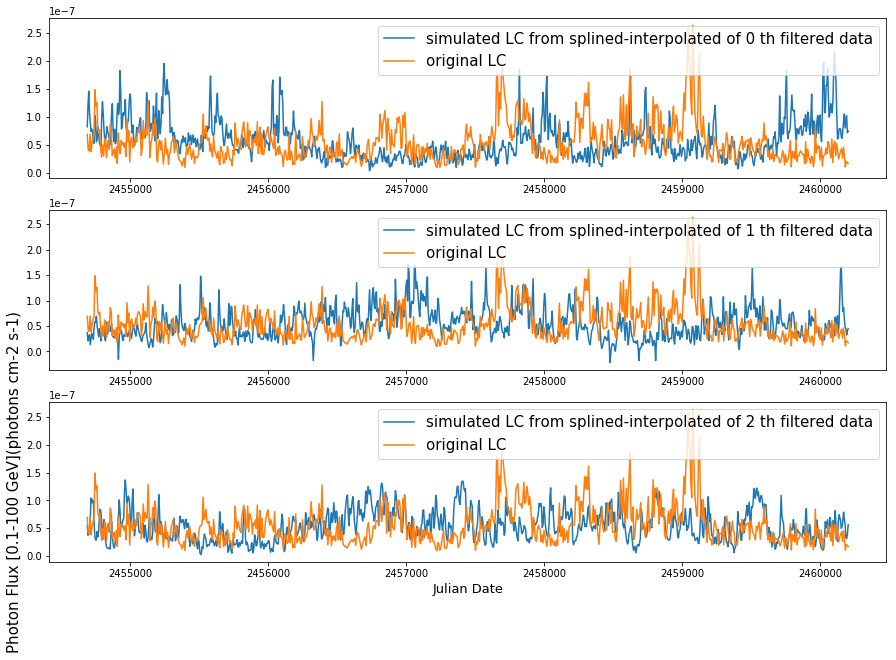

In [30]:
#------- Input parameters -------

# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009

# Probability density function params
# These values are derived from above
kappa,theta,lnmu,lnsig,weight = 6.0, 6.0, 0.3, 7.4, 0.2

# Simulation params
RedNoiseL,aliasTbin, tbin = 100,1,100

def Fix_BL(v,A,v_bend,a_high,c):
    p = BendingPL(v,A,v_bend,1.1,a_high,c)
    return p
    
#--------- Commands ---------------
# load data lightcurve
for i in range(len(flux_limits)):
    globals()['cubic_lc_%s'%i] = Lightcurve(globals()['cubic_x_%s'%i], globals()['cubic_y_%s'%i],errors=None,tbin=tbin)

    # simulate artificial light curve with Emmanoulopoulos method, scipy distribution
    globals()['delc_mod_cubic_%s'%i] = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                               mix_model, (kappa, theta, lnsig, np.exp(lnmu),
                                                              weight,1-weight),lightcurve=globals()['rmv_lc_%s'%i])

    # simulate artificial light curve with Emmanoulopoulos method, using the PSD
    # and PDF of the data light curve, with default parameters (bending power law
    # for PSD and mixture distribution of gamma and lognormal distribution for PDF)
    globals()['delc_cubic_%s'%i] = globals()['cubic_lc_%s'%i].Simulate_DE_Lightcurve()

    # save the simulated light curve as a txt file
    globals()['delc_cubic_%s'%i].Save_Lightcurve('mylightcurve_cubic_%s.dat'%i)

    globals()['mytime_%s'%i], globals()['myflux_%s'%i]= np.genfromtxt('mylightcurve_cubic_%s.dat'%i, usecols=(0,1), unpack=True)

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(len(flux_limits))
for i in range(len(flux_limits)):
    axs[i].plot(globals()['mytime_%s'%i], globals()['myflux_%s'%i], label='simulated LC from splined-interpolated of %s th filtered data'%i)
    axs[i].plot(org_time, org_flux, label='original LC')

    axs[i].legend(loc='upper right', fontsize=15)
    plt.savefig('mysimulationLC_cubic_%s.png'%i)
plt.xlabel('Julian Date', size=13)
plt.ylabel('Photon Flux [0.1-100 GeV](photons cm-2 s-1)', size=15)
plt.show()

# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc,delc_mod],names=["Data LC","Timmer \& Koenig",
#               "Emmanoulopoulos from model","Emmanoulopoulos from data"],bins=25)

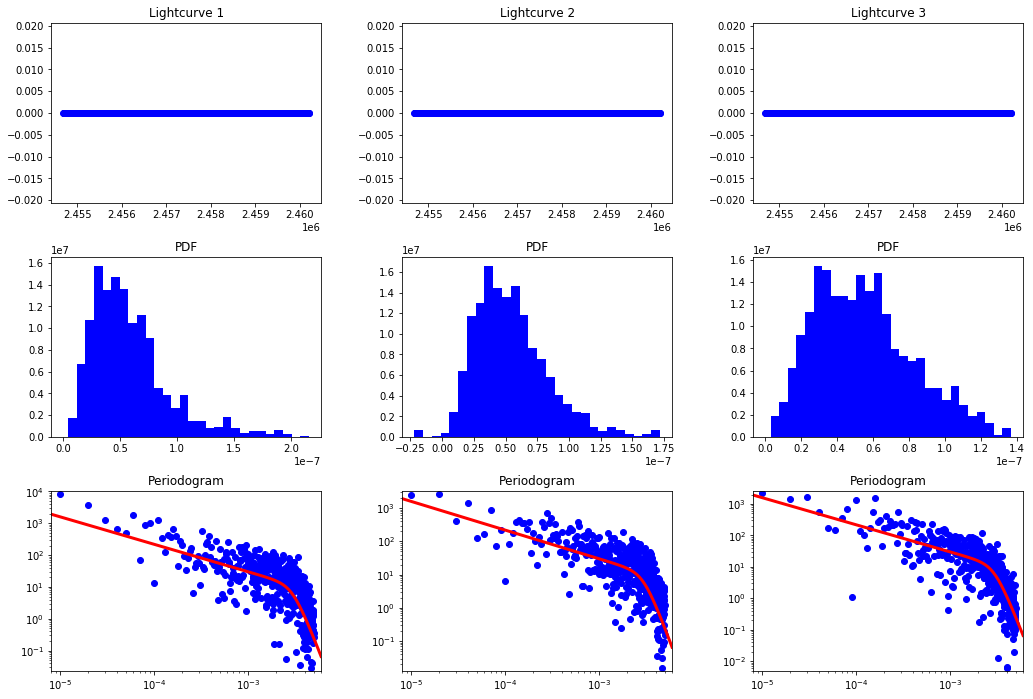

In [31]:
Comparison_Plots([delc_cubic_0,delc_cubic_1,delc_cubic_2])